# VERSIÓN 5

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [2]:
# Se cargan las imágenes del dataset MNIST
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Función que visualiza un ejemplo
def visualize(sample):
  image = training_images[sample]
  fig = plt.figure
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.show()

## PREPARACIÓN DE LOS DATOS

In [3]:
# Se cambia el tipo de los datos a float32
training_images = training_images.astype("float32")
test_images = test_images.astype("float32")

# Las imágenes pasan de matriz 28x28 a vector 784x1
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Normalización: los datos pasan a tener un valor entre [0, 1]
training_images = training_images / 255
test_images = test_images / 255

## CONJUNTO DE VALIDACIÓN

In [4]:
# Se separa en un conjunto de validación y de entrenamiento
validation_images = training_images[-10000:]
validation_labels = training_labels[-10000:]

training_images = training_images[:50000]
training_labels = training_labels[:50000]

## ENTRENAMIENTO

In [11]:
model = Sequential()

# Se añaden las capas
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Se compila el modelo
hist = model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Early Stopping cuando loss deja de mejorar
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=0)

# Se entrena el modelo
start = time.time()

hist = model.fit(
  training_images,
  to_categorical(training_labels),
  epochs=30,
  batch_size=64,
  validation_data=(validation_images,to_categorical(validation_labels)),
  callbacks=[earlyStopping]
)

end = time.time()

# Se evalua la red neuronal
eval = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/30
782/782 [==============================] - 60s 77ms/step - loss: 0.1581 - accuracy: 0.9525 - val_loss: 0.0585 - val_accuracy: 0.9835
Epoch 2/30
782/782 [==============================] - 60s 76ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0457 - val_accuracy: 0.9878
Epoch 3/30
782/782 [==============================] - 60s 77ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0470 - val_accuracy: 0.9872
Epoch 4/30
782/782 [==============================] - 60s 77ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0406 - val_accuracy: 0.9879
Epoch 5/30
782/782 [==============================] - 60s 77ms/step - loss: 0.0177 - accuracy: 0.9936 - val_loss: 0.0467 - val_accuracy: 0.9862
Epoch 6/30
782/782 [==============================] - 60s 77ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.0407 - val_accuracy: 0.9889
Epoch 7/30
782/782 [==============================] - 60s 76ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0334 - val_accuracy:

## PORCENTAJE DE ERROR

Porcentaje de error sobre el conjunto de entrenamiento: 0.29
Porcentaje de error sobre el conjunto de prueba: 0.81
Tiempo transcurrido: 599.75


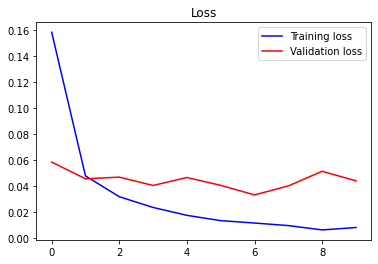

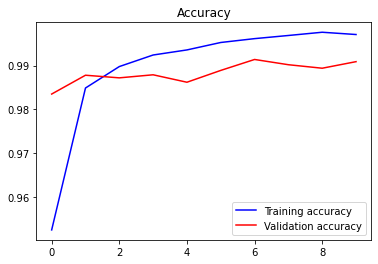

In [12]:

accuracy_val = eval[1]
error_val = (1 - accuracy_val)*100

accuracy_train = hist.history['accuracy'][-1]
error_train = (1 - accuracy_train)*100

print("Porcentaje de error sobre el conjunto de entrenamiento: "+str(round(error_train,2)))
print("Porcentaje de error sobre el conjunto de prueba: "+str(round(error_val,2)))
print("Tiempo transcurrido: "+str(round(end - start,2)))

epochs = range(len(hist.history['accuracy']))
loss = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='Validation loss')
plt.title("Loss")
plt.legend()
plt.show()
accuracy = hist.history['accuracy']
accuracy_val = hist.history['val_accuracy']
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'r', label='Validation accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

## VISUALIZACIÓN DE LA RED

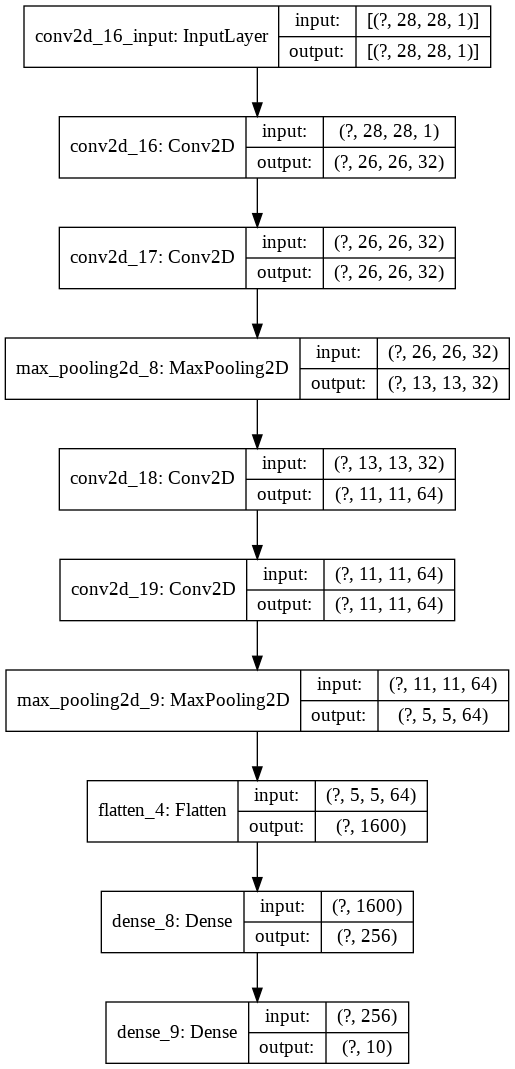

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)